<a href="https://colab.research.google.com/github/VielF/ColabProjects/blob/main/Pr%C3%A1tica_Filtragem_Espacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento Digital de Sinais: Imagens

# Exercício Avalitivo de Filtragem Espacial

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Conversão de imagem RGB em imagem Grayscale

In [29]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
#from google.colab.patches import cv2_imshow


In [2]:
#abria a imagem
img = cv2.imread('data/t1.jpg', 1)

In [3]:
#mostrando a imagem colorida
cv2.imshow('in', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
#aplicando conversão básica
#numpy
#img_grayscale_basic = (img[ : , : ,0]+img[ : , : ,1]+img[ : , : ,2])/3

#cv2
B, G, R = cv2.split(img)
img_grayscale_basic = (B+G+R)/3

img_grayscale_basic = np.array(img_grayscale_basic, dtype=np.uint8)

cv2.imshow('img_grayscale_basic', img_grayscale_basic)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
#aplicando conversão ponderada
#img_grayscale_basic = 0.299*img[ : , : ,0] + 0.587*img[ : , : ,1] + 0.114*img[ : , : ,2]

#cv2
B, G, R = cv2.split(img)
img_grayscale_pondered = 0.299*B+0.587*G+0.114*R

img_grayscale_pondered = np.array(img_grayscale_pondered, dtype=np.uint8)

cv2.imshow('img_grayscale_basic', img_grayscale_pondered)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Filtro Espacial


In [6]:
def gauss_create(sigma=1, size_x=3, size_y=3):
    '''
    Create normal (gaussian) distribuiton
    '''
    x, y = np.meshgrid(np.linspace(-1,1,size_x), np.linspace(-1,1,size_y))
    calc = 1/((2*np.pi*(sigma**2)))
    exp = np.exp(-(((x**2) + (y**2))/(2*(sigma**2))))
    
    return exp*calc

    

### Suavização

1. Implemente a sua própria convolução manualmente, em formato de função, utilizando os conceitos vistos em aula
2. Aplique a filtragem de suavização, com as máscaras 3x3, 5x5 e 7x7, com os filtros:
 - média
 - gaussino (escolha uma distribuição adequada, podendo utilizar a função acima ou recuperando a distribuição usada na OpenCV)
 - mediana 
3. Relate as observações visíveis nas imagens de saída com os filtros usados, descrevendo o comportamento visual em relação as bordas, ruídos e esmaecimento da imagem com os diferentes kernels

#### Dicas
 - Você pode adicionar ruído nas imagens usando a função random_noise: `from skimage.util import random_noise`. Cuidado com o retorno da função, talvez seja necessário regularizar a mesma novamente para o intervalo de 0 à 255.

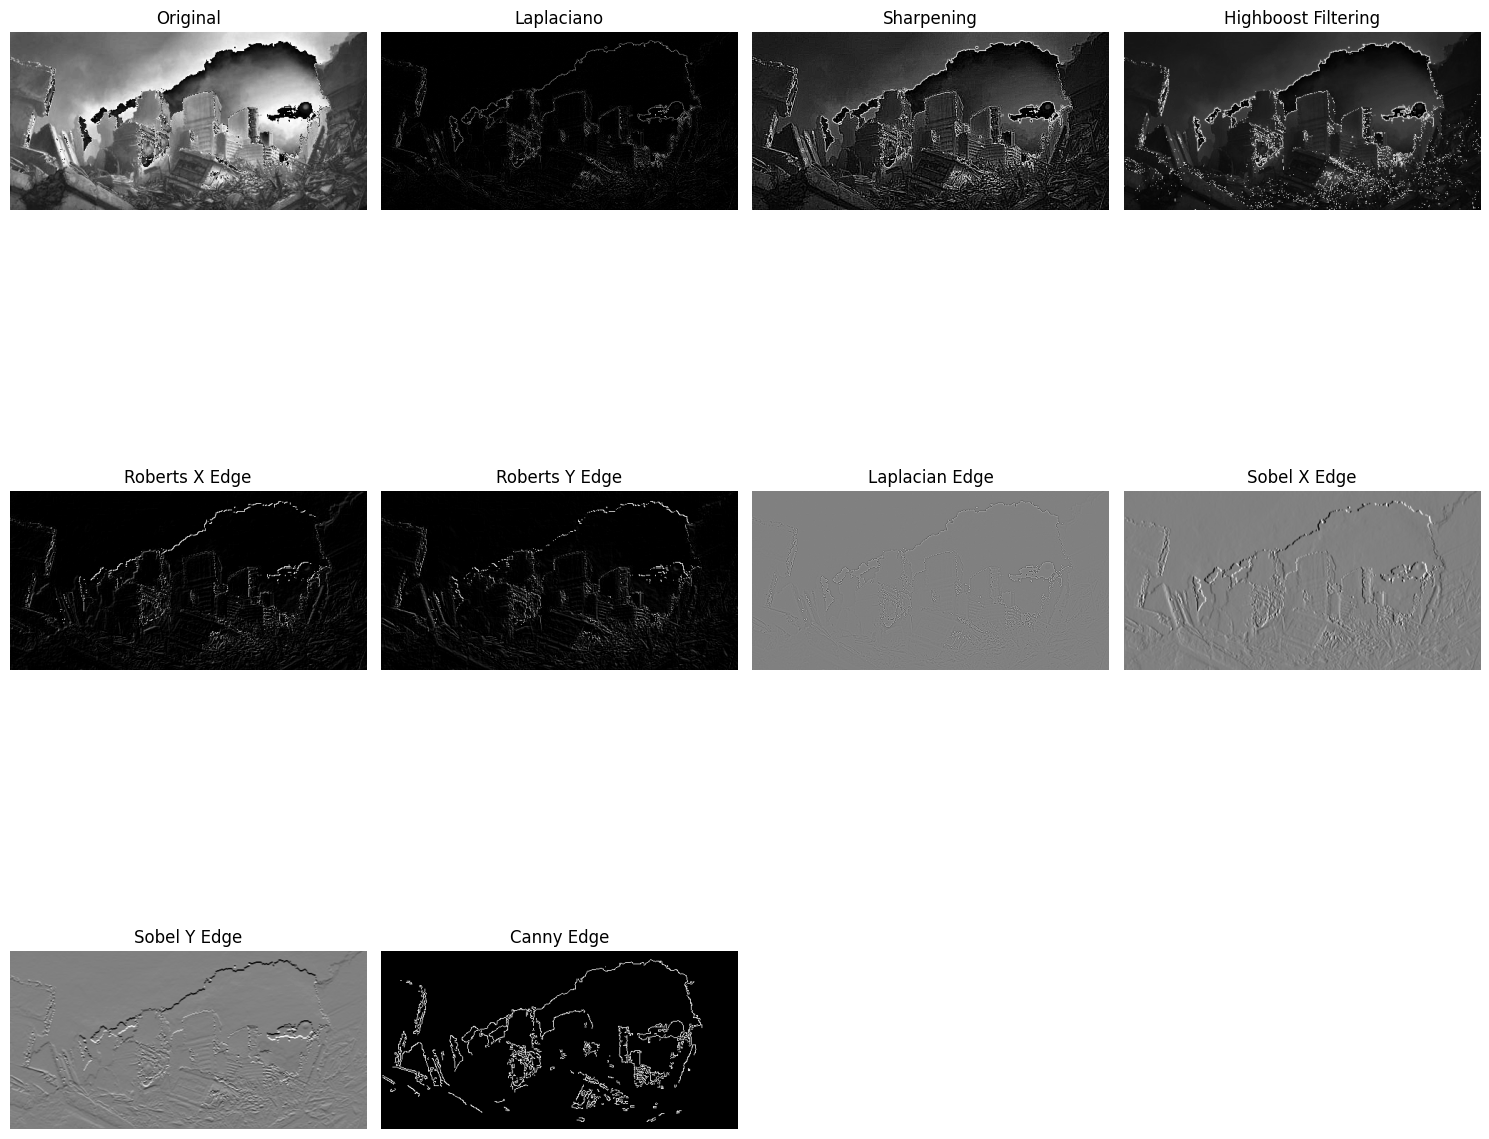

In [41]:

def convolution(image, kernel):
    h, w = image.shape
    k_h, k_w = kernel.shape
    h_half, w_half = k_h // 2, k_w // 2
    result = np.zeros((h, w), dtype=np.float32)

    for i in range(h_half, h - h_half):
        for j in range(w_half, w - w_half):
            roi = image[i - h_half:i + h_half + 1, j - w_half:j + w_half + 1]
            result[i, j] = np.sum(roi * kernel)

    return result

# Função para aplicar um filtro à imagem
def apply_filter(image, kernel):
    image = image.astype(np.float32)
    filtered_image = convolution(image, kernel)
    filtered_image = filtered_image / filtered_image.max() * 255  # Regularizar valores entre 0 e 255
    filtered_image = filtered_image.astype(np.uint8)
    return filtered_image

# Carregar a imagem
img = cv2.imread('data/t1.jpg', 1)

# Converte a imagem para escala de cinza
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
noise_img = random_noise(img_gray, mode='gaussian', var=0.05**2)
img_gray = noise_img.astype(np.float32)

# Filtros
kernel_size = 3
average_kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size * kernel_size)
gaussian_kernel = gauss_create(sigma=1, size_x=kernel_size, size_y=kernel_size)
median_kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)

# Aplicar filtros
smoothed_average = apply_filter(img_gray, average_kernel)
smoothed_gaussian = apply_filter(img_gray, gaussian_kernel)
smoothed_median = cv2.medianBlur(img_gray, kernel_size)

# Mostrar as imagens
plt.figure(figsize=(15, 12))
plt.subplot(141), plt.imshow(img_gray, cmap='gray'), plt.title('Imagem Ruidosa')
plt.subplot(142), plt.imshow(smoothed_average, cmap='gray'), plt.title('Filtro Média')
plt.subplot(143), plt.imshow(smoothed_gaussian, cmap='gray'), plt.title('Filtro Gaussiano')
plt.subplot(144), plt.imshow(smoothed_median, cmap='gray'), plt.title('Filtro Mediana')
plt.show()

### Sharpening

4. Implemente os filtros de sharpening, utilizando as diferentes mascarás apresentadas no livro de referência da disciplina:
 - Laplaciano (figura 3.37)
 - Sharpening implementado na figura 3.38
 - Unsharp Masking e Highboost Filtering
 - Implemente os detectores de borda Laplaciano, Roberts e Sobel
 - Utilize a função Canny da OpenCV na mesma imagem usando nos outros detectores
 
5. Relate as observações visíveis nas imagens de saída com os filtros usados, descrevendo o comportamento visual em relação as bordas, ruídos e esmaecimento da imagem com os diferentes kernels e para os diferentes algoritmos
6. Você observa uma discrepante melhoria na detecção de bordas pelo Canny em comparação aos outros 3 que justifique a complexidade adicional?
7. Aplique o filtro Sobel pós operação com um filtro de suavização (a sua escolha) e compare com a saída do Canny. Descreva suas observações técnicas sobre o comportamento.

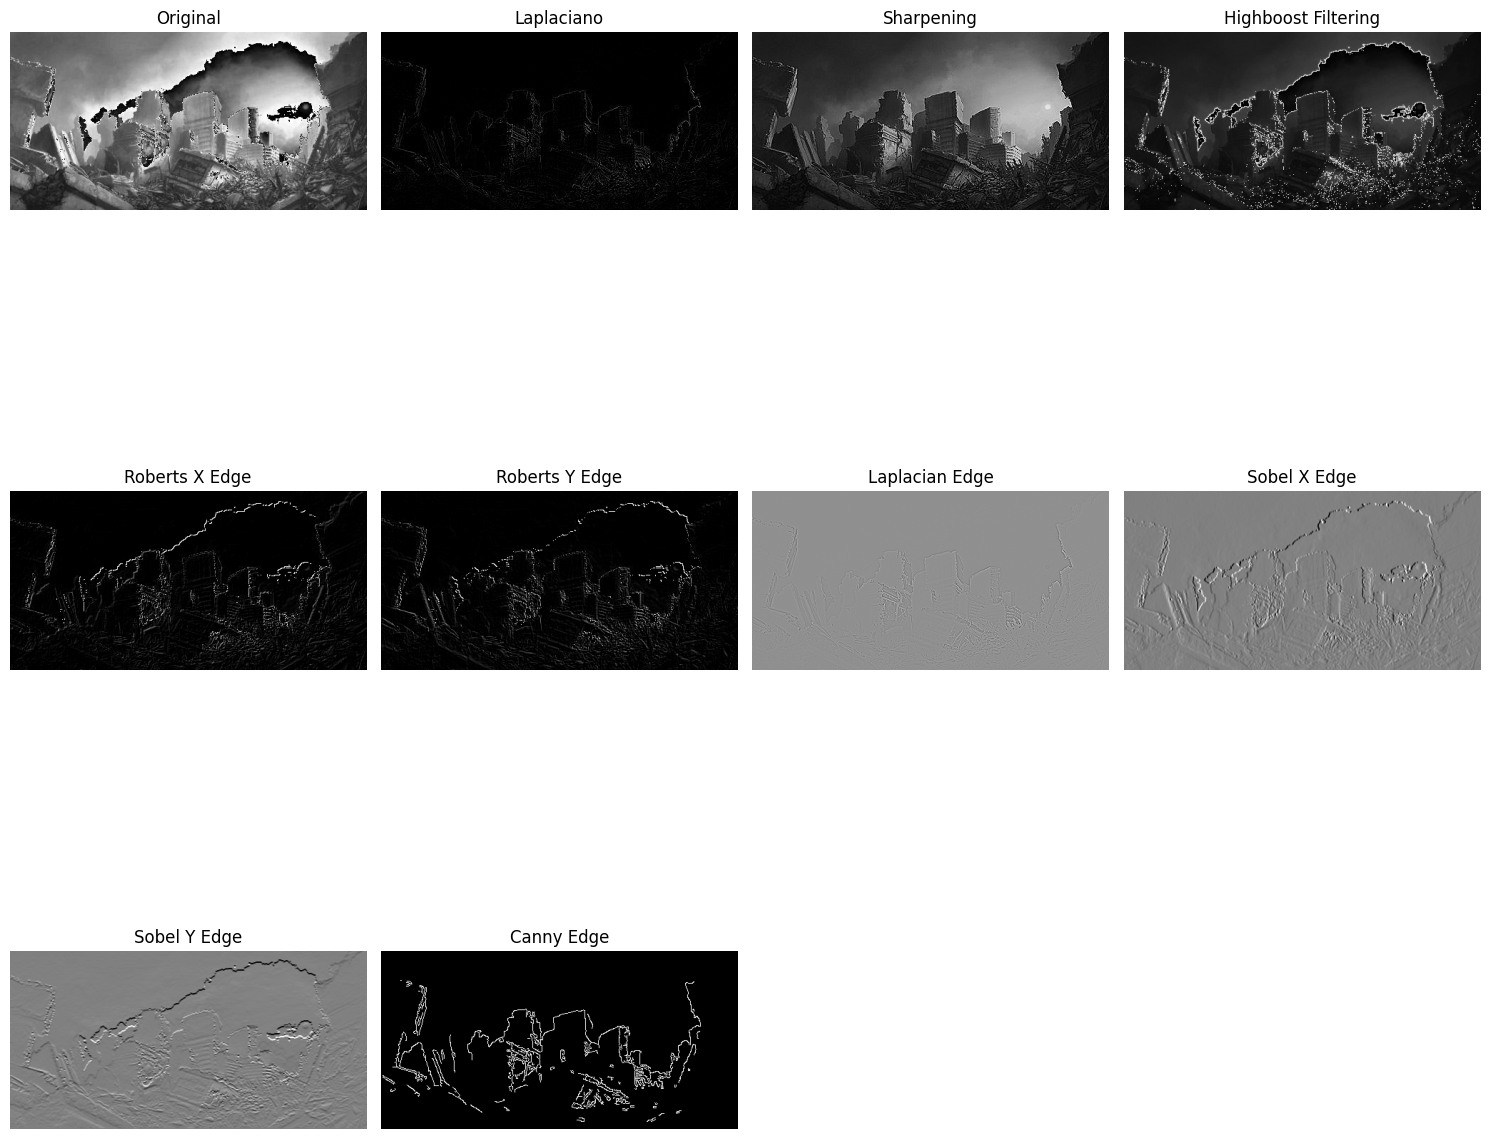

In [44]:
import cv2
import numpy as np

# Carregar a imagem em escala de cinza
img_gray = cv2.imread('data/t1.jpg', cv2.IMREAD_GRAYSCALE)

# Função para aplicar um filtro à imagem
def apply_filter(image, kernel):
    image = image.astype(np.float32)
    filtered_image = cv2.filter2D(image, -1, kernel)
    filtered_image = np.clip(filtered_image, 0, 255).astype(np.uint8)
    return filtered_image

# Filtros de Sharpening
laplacian_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=np.float32)
sharpening_kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
unsharp_mask_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]], dtype=np.float32)
highboost_filtering_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]], dtype=np.float32)

# Aplicar Filtros de Sharpening
laplacian_output = apply_filter(img_gray, laplacian_kernel)
sharpening_output = apply_filter(img_gray, sharpening_kernel)
unsharp_mask_output = apply_filter(img_gray, unsharp_mask_kernel)
highboost_output = apply_filter(img_gray, highboost_filtering_kernel)

# Detectores de Borda
laplacian_edge = cv2.Laplacian(img_gray, cv2.CV_64F)
roberts_edge_x = cv2.filter2D(img_gray, -1, np.array([[1, 0], [0, -1]], dtype=np.float32))
roberts_edge_y = cv2.filter2D(img_gray, -1, np.array([[0, 1], [-1, 0]], dtype=np.float32))
sobel_edge_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_edge_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=3)

# Função Canny
canny_output = cv2.Canny(img_gray, 100, 200)

# Definir o layout dos subplots
plt.figure(figsize=(15, 15))

# Subplot 1: Original
plt.subplot(3, 4, 1)
plt.imshow(img_grayscale_basic, cmap='gray')
plt.title('Original')
plt.axis('off')

# Subplot 2: Laplaciano
plt.subplot(3, 4, 2)
plt.imshow(laplacian_output, cmap='gray')
plt.title('Laplaciano')
plt.axis('off')

# Subplot 3: Sharpening
plt.subplot(3, 4, 3)
plt.imshow(sharpening_output, cmap='gray')
plt.title('Sharpening')
plt.axis('off')

# Subplot 4: Unsharp Masking
plt.subplot(3, 4, 4)
plt.imshow(highboost_filtering, cmap='gray')
plt.title('Highboost Filtering')
plt.axis('off')

# Subplot 5: Roberts X Edge
plt.subplot(3, 4, 5)
plt.imshow(roberts_x_edge, cmap='gray')
plt.title('Roberts X Edge')
plt.axis('off')

# Subplot 6: Roberts Y Edge
plt.subplot(3, 4, 6)
plt.imshow(roberts_y_edge, cmap='gray')
plt.title('Roberts Y Edge')
plt.axis('off')

# Subplot 7: Laplacian Edge
plt.subplot(3, 4, 7)
plt.imshow(laplacian_edge, cmap='gray')
plt.title('Laplacian Edge')
plt.axis('off')

# Subplot 8: Sobel X Edge
plt.subplot(3, 4, 8)
plt.imshow(sobel_x_edge, cmap='gray')
plt.title('Sobel X Edge')
plt.axis('off')

# Subplot 9: Sobel Y Edge
plt.subplot(3, 4, 9)
plt.imshow(sobel_y_edge, cmap='gray')
plt.title('Sobel Y Edge')
plt.axis('off')

# Subplot 10: Canny Edge
plt.subplot(3, 4, 10)
plt.imshow(canny_output, cmap='gray')
plt.title('Canny Edge')
plt.axis('off')

# Ajustar o layout para evitar sobreposições
plt.tight_layout()
plt.show()